In [110]:
import pandas as pd
from fitter import Fitter, get_common_distributions
import numpy as np
import matplotlib.pyplot as plt


In [14]:
order_df_raw = pd.read_excel('Orders.xlsx')
restaurant_df_raw = pd.read_excel('Restaurants.xlsx')

In [73]:
# order_df_raw.head()
# order_df_raw.tail()
# order_df_raw.shape
# order_df_raw.columns
# order_df_raw['Restaurant ID'].unique()
# order_df_raw['Order Date'].unique()

# restaurant_df_raw

In [102]:
# Get array of order date (sorted ascending) for each restaurant

# type(order_df_raw.groupby('Restaurant ID')['Order Date'].apply(np.array).values)
order_date_series_by_restaurant = order_df_raw.sort_values(['Restaurant ID', 'Order Date']).groupby('Restaurant ID')['Order Date'].apply(np.array)
order_date_dict_by_restaurant = order_date_series_by_restaurant.to_dict()
# order_date_series_by_restaurant.loc[1]

Assumptions and context:
1. Orders are made in one day
2. No breaks between orders
3. Multiple orders can be made at the same time

In [125]:
# get intervals in minutes
intervals_dict_by_restaurant = {}
for k, v in order_date_dict_by_restaurant.items():
    intervals_dict_by_restaurant[k] = ((v[1:] - v[:-1]) / (1000000000*60)).astype('float64')
# intervals_dict_by_restaurant
# order_date_dict_by_restaurant

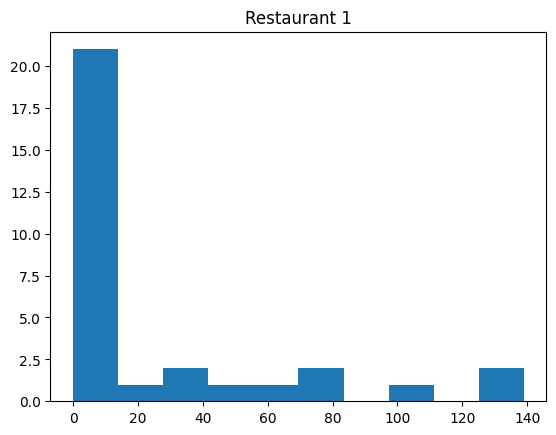

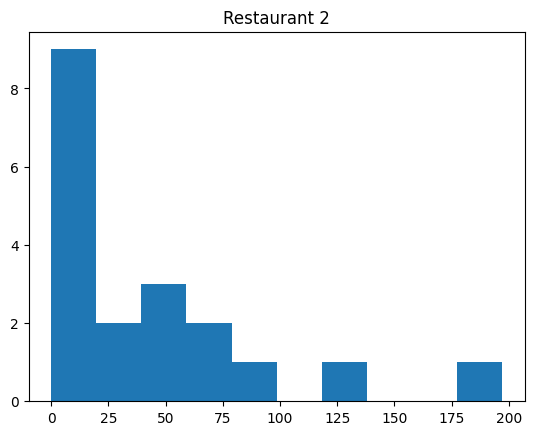

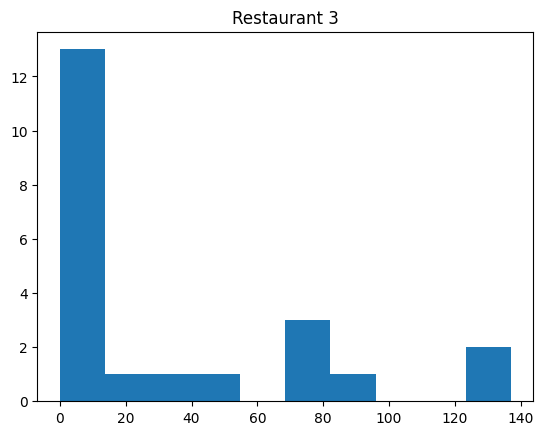

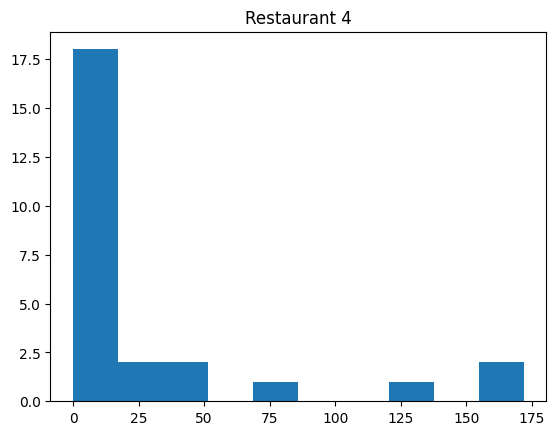

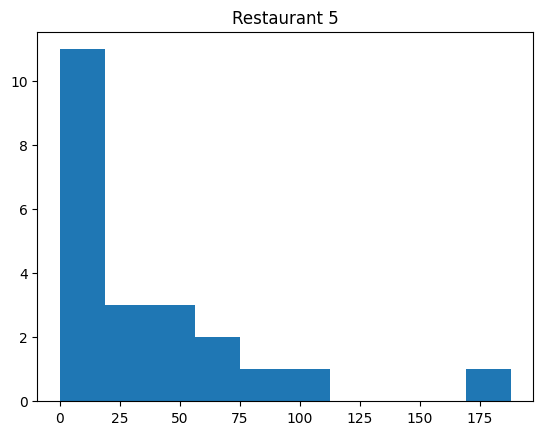

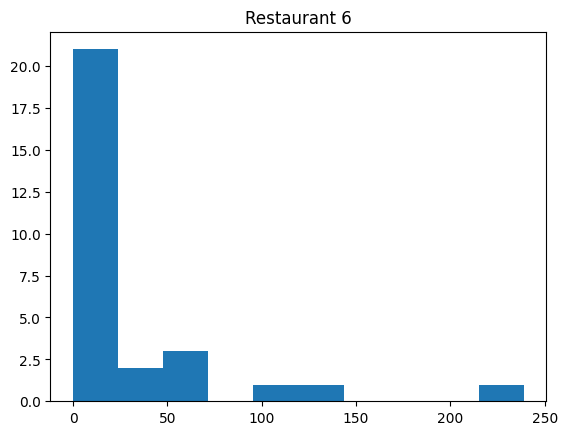

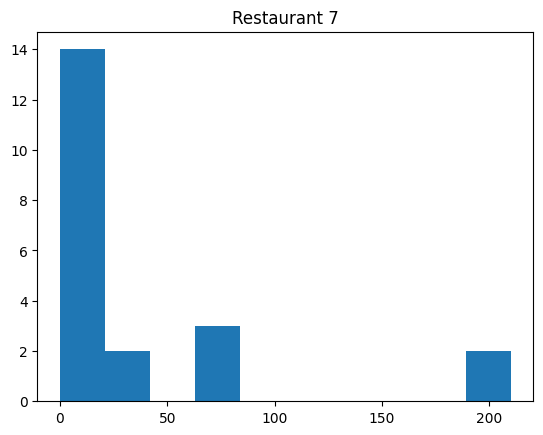

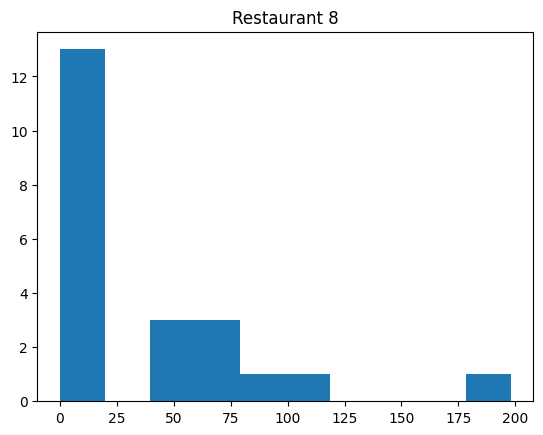

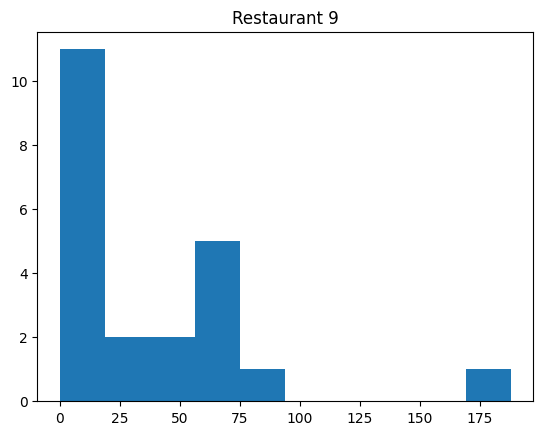

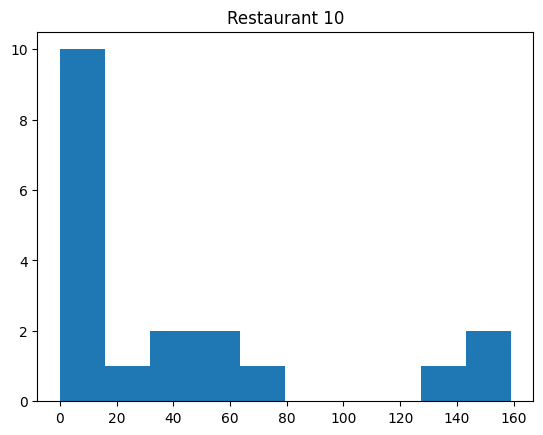

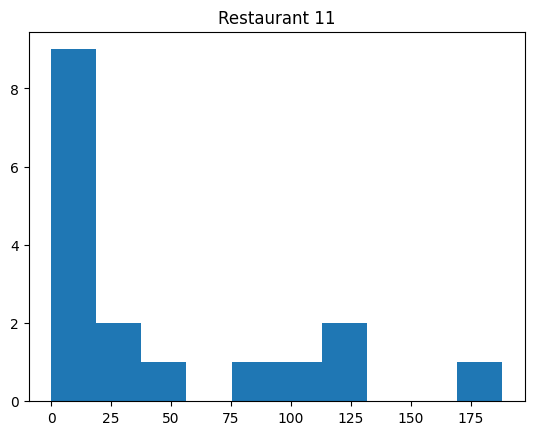

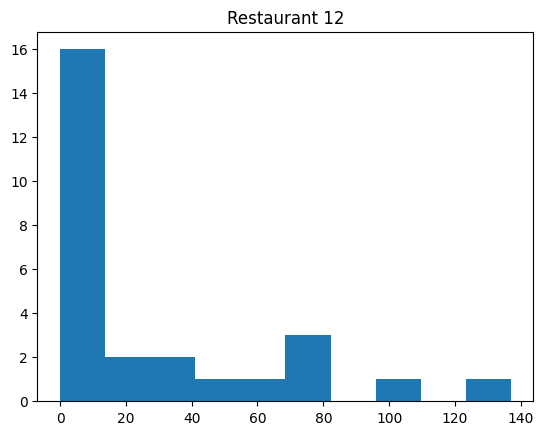

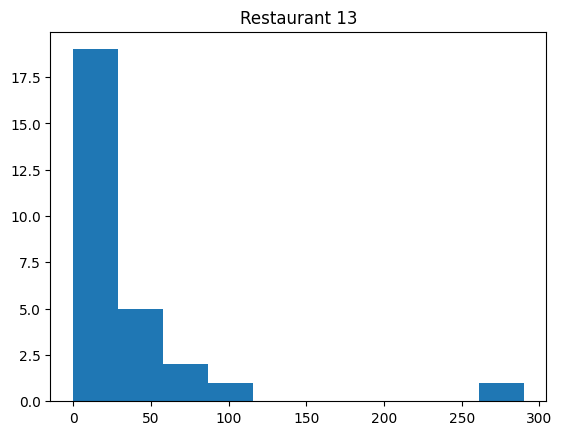

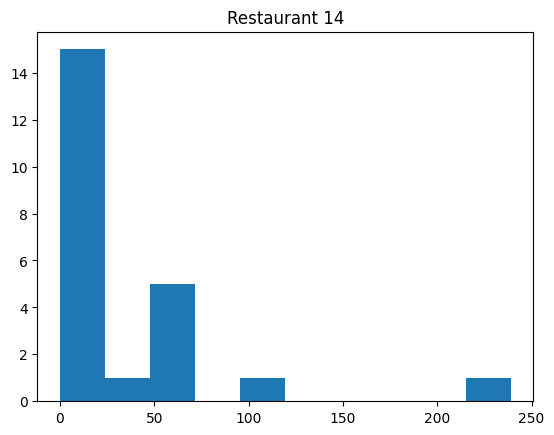

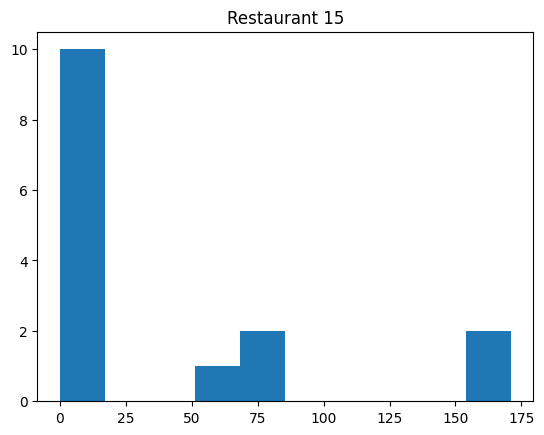

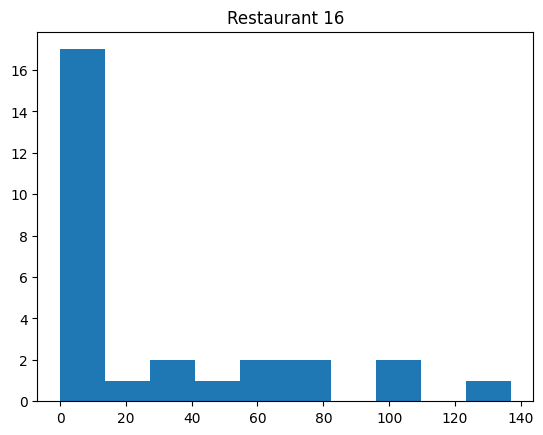

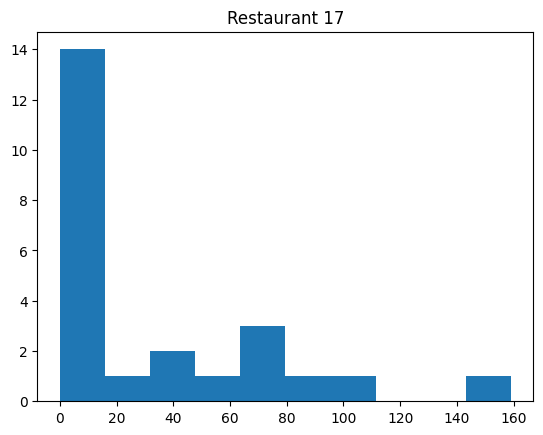

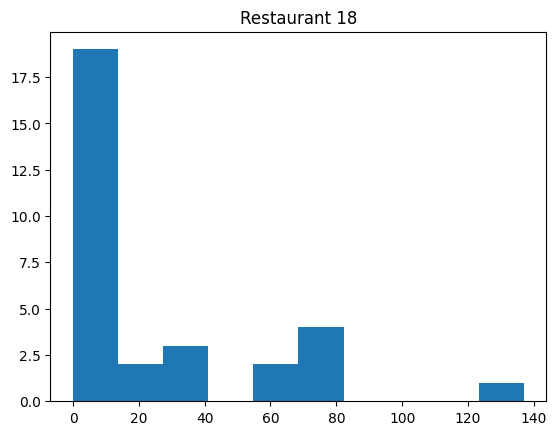

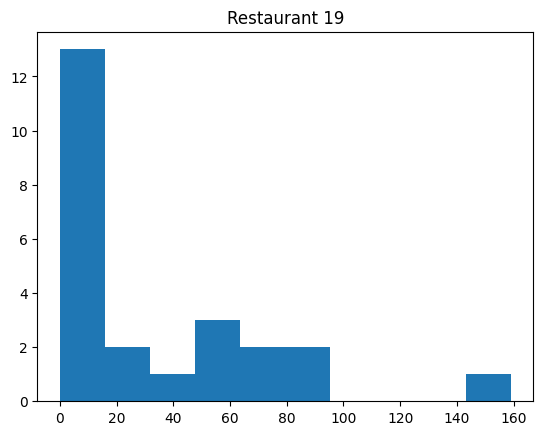

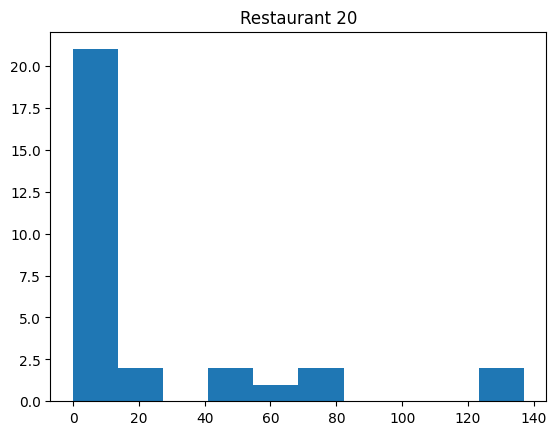

In [132]:
# view distribution of intervals for each restaurant

for k, v in intervals_dict_by_restaurant.items():
    plt.hist(v)
    plt.title('Restaurant {k}'.format(k=k))
    plt.show()

In [154]:
# find best fitting distribution to explain

for k, v in intervals_dict_by_restaurant.items():
    f = Fitter(v, distributions=get_common_distributions())
    f.fit()
    # f.summary()
    print('Restaurant ', k)
    print(f.get_best(method="sumsquare_error"))
    print("\n")

# f = Fitter(intervals_dict_by_restaurant[1], distributions=get_common_distributions())
# f.fit()
# f.summary()

# f.get_best(method="sumsquare_error",)

Restaurant  1
{'cauchy': {'loc': 0.22742925289465782, 'scale': 1.473878976126582}}


Restaurant  2
{'gamma': {'a': 0.2943847677723094, 'loc': -2.708018982677885e-26, 'scale': 70.76982083888194}}


Restaurant  3
{'gamma': {'a': 0.1780658231617633, 'loc': -4.803339419130003e-27, 'scale': 26.499526783664024}}


Restaurant  4
{'cauchy': {'loc': 0.2736192343532697, 'scale': 1.3202772001915375}}


Restaurant  5
{'powerlaw': {'a': 0.2711994359783009, 'loc': -1.1525699244433578e-24, 'scale': 191.6661694244671}}


Restaurant  6
{'exponpow': {'b': 0.16791839007332593, 'loc': -7.777814372365957e-26, 'scale': 298.1492040775887}}


Restaurant  7
{'cauchy': {'loc': 0.553667195254381, 'scale': 2.536926063781254}}


Restaurant  8
{'chi2': {'df': 1.4499640618615453, 'loc': -1.6948169431397988e-26, 'scale': 1.733346315024689}}


Restaurant  9
{'gamma': {'a': 0.23170391389118428, 'loc': -4.037532559430411e-28, 'scale': 65.04220346601367}}


Restaurant  10
{'gamma': {'a': 0.39689800440955003, 'loc': -4.27